# Lab Assignment 10:

# Write a python program to implement LDA as Dimension Reduction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#let's start by importing data set using numpy
data = pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,class
0,1,5.1,3.5,1.4,0.2,Iris-setosa,0
1,2,4.9,3.0,1.4,0.2,Iris-setosa,0
2,3,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...,...
95,96,5.7,3.0,4.2,1.2,Iris-versicolor,1
96,97,5.7,2.9,4.2,1.3,Iris-versicolor,1
97,98,6.2,2.9,4.3,1.3,Iris-versicolor,1
98,99,5.1,2.5,3.0,1.1,Iris-versicolor,1


In [3]:
#loading features and converting to a matrix X
newdata = data.values

x1 = newdata[:, 1]
n = len(x1)
x2 = newdata[:, 2]

In [4]:
#standarizing or normalizing data on scale of mean = 0 and varience =1
n = len(x1)
x1_norm = np.array([])
x2_norm = np.array([])
xtemp1 = 0
xtemp2 = 0

for i in range(n):
    xtemp1 = (x1[i]-np.mean(x1))/np.std(x1)
    xtemp2 = (x2[i]-np.mean(x2))/np.std(x2)
    x1_norm = np.append(x1_norm, xtemp1)
    x2_norm = np.append(x2_norm, xtemp2)
    xtemp1 = 0
    xtemp2 = 0

x1_norm = x1_norm.reshape(n, 1)
x2_norm = x2_norm.reshape(n, 1)

 calculating number of class for data which is 
 1. class-1 - Iris-setosa
 2. class-2 -Iris-virginica

In [5]:
# covarience of our p dimensional data is equal to covarience of each class so
X = np.hstack((x1_norm, x2_norm))
cov_matrix = (X.T).dot(X)/n
print(cov_matrix)

[[ 1.         -0.19764563]
 [-0.19764563  1.        ]]


In [6]:
# now we will make matrix for this class to calculate linear classifier
F1 = np.hstack((x1_norm[:50], x2_norm[:50]))
print(F1.shape)

(50, 2)


In [7]:
F2 = np.hstack((x1_norm[50:], x2_norm[50:]))
print(F2.shape)

(50, 2)


In [11]:
#calculating mean vectors for classes
M0 = np.mean(F1)
M1 = np.mean(F2)
print("----------------------Mean of F1 class--------------------")
print(M0)
print()
print("----------------------Mean of F2 class--------------------")
print(M1)
print()

----------------------Mean of F1 class--------------------
-0.022135371293520868

----------------------Mean of F2 class--------------------
0.02213537129351587



In [12]:
# calculate with in class scatter matrix
component_1 = (F1 - M0).dot((F1-M0).T)
component_2 = (F2 - M1).dot((F2-M1).T)
Sw = component_1 + component_2
print(Sw.shape)

(50, 50)


In [21]:
# finding covanrience or rank to check whether Sw is invertible or not
rank = np.linalg.matrix_rank(component_1)
print("Rank: ", rank)

Sw_inverse = np.linalg.inv(Sw)
Sw_cov = np.cov(Sw)
print("---------------Sw inverse---------------")
print(Sw_inverse.shape)
Sw_in_co = (Sw_cov.T).dot(Sw_cov)
print(Sw_in_co.shape)

Rank:  2
---------------Sw inverse---------------
(50, 50)
(50, 50)


In [22]:
# calculating w
w = Sw_inverse.dot(M1-M0)
print(w.shape)

(50, 50)


In [23]:
#calculating mean projection
m0 = (w.T).dot(M0)
m1 = (w.T).dot(M1)
print("The shape of m0",m0.shape)
print("The shape of m1",m1.shape)

The shape of m0 (50, 50)
The shape of m1 (50, 50)


In [24]:
#scale independent varience
S0 = (((w.T).dot(F1))-M0)**2
S1 = (((w.T).dot(F2))-M1)**2

In [36]:
Y = newdata[:, 6]
Y = Y.reshape(n,1)

<IPython.core.display.Javascript object>


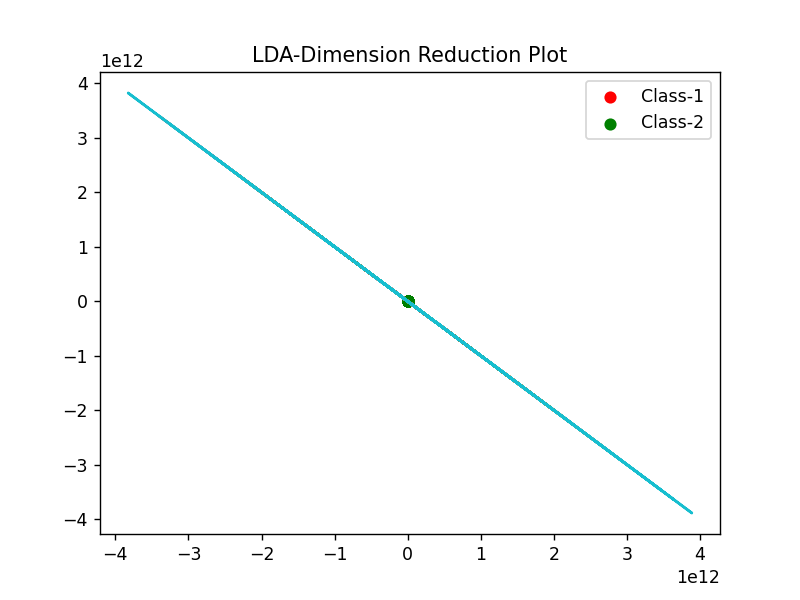

In [37]:
#plotiing with projection mean
%matplotlib notebook
plt.scatter(x1, Y, color = 'r',label = "Class-1")
plt.scatter(x2, Y, color = 'g',label = "Class-2")
plt.plot(m0, m1)
plt.title('LDA-Dimension Reduction Plot')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


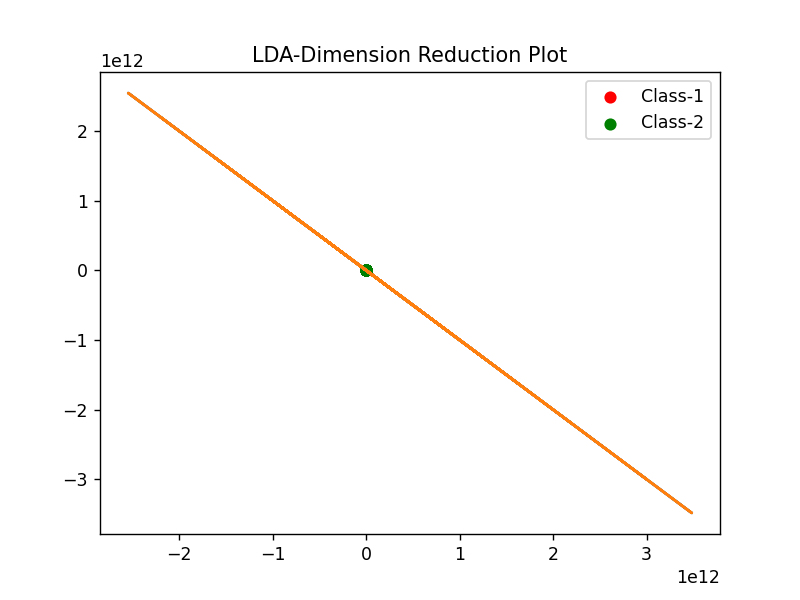

In [38]:
#plotting with z 
%matplotlib notebook
z1 = (w.T).dot(F1)
z2 = (w.T).dot(F2)
plt.scatter(x1,Y , color = 'r',label = "Class-1")
plt.scatter(x2, x2, color = 'g',label = "Class-2")
plt.plot(z1, z2)
plt.title('LDA-Dimension Reduction Plot')
plt.legend()
plt.show()